In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

import trompy as tp

In [3]:
folder = "../"

In [4]:
with open(folder+"fostrap_metafile.csv", "r") as f:
    r = csv.writer(f)
    header = f.readlines()[0]
    f.seek(0)
    metafilerows = f.readlines()[1:]

mouserows = []
for i in metafilerows:
    mouserows.append(i.split(','))

In [5]:
def get_cell_data(mouse, cells, normalize_to_area=False):
    cells = "fos"

    # Use these when selecting data from source folders, not repository
    # subfolder = "\\nutil\\Reports\\{}_{}_RefAtlasRegions\\{}_{}_RefAtlasRegions.csv".format(mouse, cells, mouse, cells)
    # folder="D:\\Test Data\\fostrap\\"

    folder = "../data/"
    subfolder = "_{}_RefAtlasRegions.csv".format(cells)

    with open(folder+mouse+subfolder, "r") as f:
        r = csv.writer(f)
        header = f.readlines()[0]
        f.seek(0)
        filerows = f.readlines()[1:]

    tablerows = []
    for i in filerows:
        tablerows.append(i.split(';'))

    nutil_data = {}
    for row in tablerows:
        key=row[1]
        object_count=row[5]
        area=row[2]

        if normalize_to_area:
            try:
                nutil_data[key]=[int(object_count) / int(area)]
            except ZeroDivisionError:
                nutil_data[key]=0
        else:
            nutil_data[key]=[int(object_count)]
    
    df = pd.DataFrame.from_dict(nutil_data)

    return df


In [6]:
cols = ["mouse", "diet", "sex", "solution1", "solution2", "celltype"]
df = pd.DataFrame()

# for TRAP cells
cells="trap"
for row in mouserows:
    df_id = pd.DataFrame([[row[0], row[1], row[2], row[3], row[4], cells]], columns=cols)
    try:
        df_cells = get_cell_data(row[0], cells, normalize_to_area=False)
        print("Yay for {}".format(row[0]))
    except FileNotFoundError:
        print("Data for {} do not seem to be available yet.".format(row[0]))
        continue
    
    df_mouse = pd.concat([df_id, df_cells], axis=1)
    df_mouse.set_index("mouse", drop=True, inplace=True)
    
    if not df.empty:
        df = pd.concat([df, df_mouse], axis=0)
    else:
        df  = df_mouse




Yay for FT106
Yay for FT112
Yay for FT118
Yay for FT120
Yay for FT126
Yay for FT136
Yay for FT127
Yay for FT133


In [7]:
df["Parasubthalamic nucleus"]

mouse
FT106    128
FT112    109
FT118     12
FT120     20
FT126     79
FT136    126
FT127    115
FT133     74
Name: Parasubthalamic nucleus, dtype: int64

In [8]:
# for searching for column names

substring="tegmental"
for i in df.columns:
    if substring in i:
        print(i)


df.loc[:,['thal' in i for i in df.columns]]

Ventral tegmental area
Ventral tegmental nucleus
Anterior tegmental nucleus
Dorsal tegmental nucleus
Lateral tegmental nucleus
Posterodorsal tegmental nucleus
Laterodorsal tegmental nucleus
pallidotegmental fascicle
doral tegmental decussation
ventral tegmental decussation
central tegmental bundle
mammillotegmental tract
dorsal tegmental tract


,Ventral group of the dorsal thalamus,Ventral anterior-lateral complex of the thalamus,Ventral medial nucleus of the thalamus,Ventral posterior complex of the thalamus,Ventral posterolateral nucleus of the thalamus,"Ventral posterolateral nucleus of the thalamus, parvicellular part",Ventral posteromedial nucleus of the thalamus,"Ventral posteromedial nucleus of the thalamus, parvicellular part",Posterior triangular thalamic nucleus,"Geniculate group, dorsal thalamus",...,propriohypothalamic pathways,"propriohypothalamic pathways, dorsal","propriohypothalamic pathways, lateral","propriohypothalamic pathways, medial","propriohypothalamic pathways, ventral",periventricular bundle of the hypothalamus,mammillothalamic tract,dorsal thalamus related,periventricular bundle of the thalamus,epithalamus related
mouse,,,,,,,,,,,,,,,,,,,,,
FT106,0,132,275,0,47,23,143,217,32,0,...,0,0,0,0,0,0,103,0,0,0
FT112,0,13,73,0,6,0,2,0,29,0,...,0,0,0,0,0,0,55,0,0,0
FT118,0,6,25,0,5,1,5,10,32,0,...,0,0,0,0,0,0,44,0,0,0
FT120,0,207,199,0,21,0,80,12,19,0,...,0,0,0,0,0,0,38,0,0,0
FT126,0,33,79,0,2,0,1,14,68,0,...,0,0,0,0,0,0,51,0,0,0
FT136,0,119,247,0,64,9,68,15,61,0,...,0,0,0,0,0,0,132,0,0,0
FT127,0,47,112,0,10,3,11,37,59,0,...,0,0,0,0,0,0,78,0,0,0
FT133,0,24,156,0,11,1,16,2,18,0,...,0,0,0,0,0,0,59,0,0,0


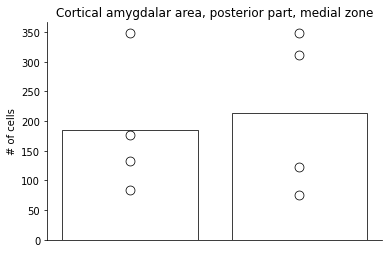

In [21]:
import trompy as tp
import matplotlib.pyplot as plt

def single_region_fig(df, key):

    data_nr = df[df["diet"] == "nr"][key]
    data_pr = df[df["diet"] == "pr"][key]

    f, ax = plt.subplots()
    _ = tp.barscatter([data_nr, data_pr], ax=ax)
    ax.set_title(key)
    ax.set_ylabel("# of cells")

single_region_fig(df, "Cortical amygdalar area, posterior part, medial zone")
        


In [18]:
# for each area
from pandas.api.types import is_numeric_dtype
import numpy as np

def normalize_df(df):

    normalized_df = df.copy()
    for column in df.columns:
        if is_numeric_dtype(df[column]):
            if np.sum(df[column]) == 0:
                normalized_df.drop([column], axis=1, inplace=True)
                continue
            normalized_df[column] = (df[column] - df[column].mean()) /df[column].std()
            

    return normalized_df

normalized_df = normalize_df(df)

# normalized_df=(df-df.mean())/df.std()



In [19]:
normalized_df

,diet,sex,solution1,solution2,celltype,Clear Label,root,"Frontal pole, layer 6a","Primary motor area, Layer 1","Primary motor area, Layer 2/3",...,mammillary peduncle,stria medullaris,fasciculus retroflexus,habenular commissure,lateral ventricle,subependymal zone,choroid plexus,third ventricle,cerebral aqueduct,fourth ventricle
mouse,,,,,,,,,,,,,,,,,,,,,
FT106,nr,male,casein,casein,trap,1.926334,1.134691,-0.540062,-0.754310,-0.626029,...,-0.906729,-1.041116,1.658682,0.283527,1.676879,1.736407,2.000007,1.839009,-0.548636,-0.353553
FT112,pr,male,casein,water,trap,-0.761758,-0.247588,-0.540062,0.649058,0.338123,...,0.985575,-0.676550,0.523794,-0.472545,-0.625300,-0.868203,-0.222223,-0.363272,-0.537636,-0.353553
FT118,nr,male,casein,casein,trap,-0.119778,0.839692,-0.540062,-0.941426,-1.097392,...,-0.512499,0.389104,-0.567444,-0.808577,0.100855,0.089814,-0.373985,1.232685,2.047417,-0.353553
FT120,pr,male,casein,casein,trap,0.936484,1.471832,-0.540062,-0.894647,-0.818859,...,0.512499,-1.686117,-0.960289,-0.724569,1.394485,1.227460,1.046074,0.061852,1.079397,-0.353553
FT126,pr,male,casein,casein,trap,-0.924768,-1.174726,-0.540062,0.228047,0.627368,...,-0.670191,1.118236,-1.396785,1.963687,-0.818941,-0.688575,-0.775071,-0.802334,-0.548636,-0.353553
FT136,pr,male,casein,water,trap,0.219468,-0.812300,1.620185,2.052426,2.020032,...,-0.670191,0.557365,0.785691,-0.472545,-0.259533,0.029938,-0.211383,-0.774457,-0.548636,-0.353553
FT127,nr,male,casein,water,trap,-0.861807,-0.551015,1.620185,-0.192963,-0.374278,...,-0.591345,0.725626,-0.305547,0.955591,-0.848525,-0.958018,-0.742550,-0.655980,-0.416634,2.474874
FT133,nr,male,casein,water,trap,-0.414175,-0.660586,-0.540062,-0.146184,-0.068964,...,1.852882,0.613452,0.261897,-0.724569,-0.619921,-0.568823,-0.720870,-0.537503,-0.526636,-0.353553


In [12]:
def find_biggest_diffs(normalized_df):

    df_diff = pd.DataFrame(columns=["Difference score"])
    for column in normalized_df.columns:
        if is_numeric_dtype(df[column]):
            data_nr = normalized_df[normalized_df["diet"] == "nr"][column]
            data_pr = normalized_df[normalized_df["diet"] == "pr"][column]

            df_new = pd.DataFrame(data=[data_pr.mean() - data_nr.mean()], columns=["Difference score"], index=[column])
            df_diff = pd.concat([df_diff, df_new])

    return df_diff

df_diff = find_biggest_diffs(normalized_df)


In [13]:
for row in df_diff.sort_values(by="Difference score"):
    print(row)

Difference score


In [14]:
sorted_df_diff = df_diff.sort_values(by="Difference score")

sorted_df_diff.to_csv(folder+"difference.csv")